In [1]:
%matplotlib inline
import pylab
import imageio
import numpy as np
from IPython.display import HTML
import cv2

In [2]:
filename = 'jr_move_flow.mp4'

In [3]:
HTML("""<video width="320" height="240" controls>
<source src="%s" type="video/mp4"></video>""" % filename)

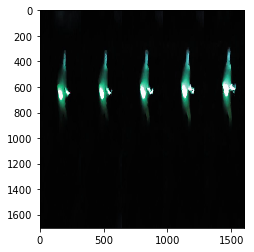

In [10]:
# change vertical size
scale = 3

# read all images from video
vid = imageio.get_reader(filename,  'ffmpeg')
all_images = [vid.get_data(ii) for ii in range(vid.get_length())]

# show example of first 5 images
example = np.concatenate(all_images[:5], axis=1)
height, width, rgb = example.shape
pylab.imshow(cv2.resize(example, (width, scale*height)))
pylab.show()

# process all
all_images = np.concatenate(all_images, axis=1)
height, width, rgb = all_images.shape
all_images = cv2.resize(all_images, (width, scale*height))

# save
max_size = 20000  # J'ai l'impression que ca bug au dela, a verifier
imageio.imwrite('%s.png' % filename, all_images[:, :max_size])